In [1]:
import numpy as np
import pickle
import librosa
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

In [4]:
with open('./data/JSB-Chorales/jsb-chorales-quarter.pkl', 'rb') as p:
    data = pickle.load(p, encoding="latin1")

In [2]:
def mcd(y_hat, y):
    return (10 * np.sqrt(2) / np.log(10)) * np.linalg.norm(y - y_hat)

In [3]:
def preprocess(data):
    for i, _ in enumerate(data):
        for j, _ in enumerate(data[i]):
            if len(data[i][j]) < len(data[0][0]):
                sample_list = list(data[i][j])
                sample_list += (len(data[0][0]) - len(data[i][j])) * [-1]
                data[i][j] = tuple(sample_list)
    data = sorted(data, key=len, reverse=True)
    processed_set = []
    for sample in data:
        processed_set.append(np.array(sample, dtype=float))
    return processed_set

In [5]:
train_data, valid_data, test_data = data['train'], data['valid'], data['test']
train_set, valid_set, test_set = preprocess(train_data), preprocess(valid_data), preprocess(test_data)

In [6]:
y, sr = librosa.load('data/nottingham-dataset/wav/ashover1.wav')

In [10]:
write("example.wav", sr, y)

In [24]:
len(y) / sr

25.025986394557822

In [13]:
y_third = librosa.effects.pitch_shift(y, sr, n_steps=-10) #升高大三度

/tmp/ipykernel_14318/1445409480.py:1: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y_third = librosa.effects.pitch_shift(y, sr, n_steps=-10) #升高大三度


In [12]:
write("example.wav", sr, y_third)

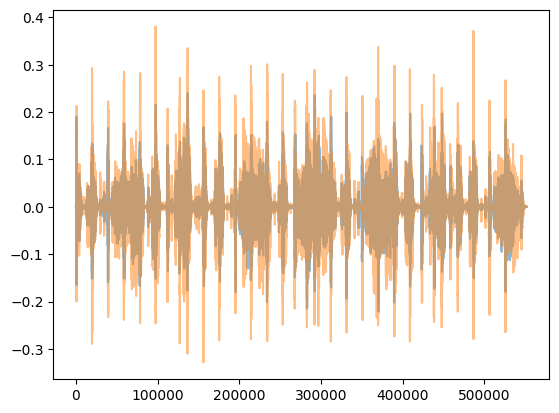

In [33]:
plt.plot(y_third, alpha=0.5)
plt.plot(y, alpha=0.5)
plt.show()

In [49]:
samplerate = 44100; fs = 100
t = np.linspace(0., 20., samplerate * 20)

amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)

write("example.wav", samplerate, data.astype(np.int16))

In [17]:
amplitude

32767

In [ ]:
data = test_set[0][:, 0]

In [ ]:
write("example.wav", 64, data.astype(np.int16))

In [ ]:
mcd(train_set[0][:, 0], train_set[0][:, 2])

1096.1613371133774

In [ ]:
mcd(librosa.effects.pitch_shift(train_set[0][:, 0], 400, n_steps=-1), train_set[0][:, 1])

/tmp/ipykernel_3280/4165483051.py:1: FutureWarning: Pass sr=400 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mcd(librosa.effects.pitch_shift(train_set[0][:, 0], 400, n_steps=-1), train_set[0][:, 1])


636.4612048423537

In [ ]:
y, sr = librosa.load(librosa.ex('choice'))

In [ ]:
y

array([ 1.02893655e-05,  1.97995882e-06,  2.52699670e-06, ...,
        4.25853887e-06, -7.86152214e-06, -1.86528869e-05], dtype=float32)

In [ ]:
y_third = librosa.effects.pitch_shift(y, sr, n_steps=4)

/tmp/ipykernel_1739/475170943.py:1: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y_third = librosa.effects.pitch_shift(y, sr, n_steps=4)


In [ ]:
y_third.shape

(551823,)